In [29]:
# Importing modules
import pandas as pd
import os

In [30]:
def load_outlet_reviews(outlet_name, base_path='../All/'):
    """
    Load reviews for a specific Anytime Fitness outlet
    
    Parameters:
    outlet_name (str): Name of the outlet (e.g., 'Anytime Fitness Buona Vista')
    base_path (str): Base directory path where review CSV files are stored
    
    Returns:
    pandas.DataFrame: DataFrame containing the outlet's reviews
    """
    # Construct the filename
    filename = f"{outlet_name}_reviews.csv"
    filepath = os.path.join(base_path, filename)
    
    try:
        # Read the CSV file
        outlet_reviews = pd.read_csv(filepath, encoding='utf-8')
        
        print(f"✅ Successfully loaded {len(outlet_reviews)} reviews for {outlet_name}")
        print(f"📊 Columns: {list(outlet_reviews.columns)}")
        # print(f"📈 Rating distribution:")
        # if 'rating' in outlet_reviews.columns:
        #     rating_counts = outlet_reviews['rating'].value_counts().sort_index(ascending=False)
        #     for rating, count in rating_counts.items():
        #         print(f"   {rating} stars: {count} reviews")
        
        return outlet_reviews
        
    except FileNotFoundError:
        print(f"❌ File not found: {filepath}")
        print(f"💡 Available files in {base_path}:")
        if os.path.exists(base_path):
            csv_files = [f for f in os.listdir(base_path) if f.endswith('_reviews.csv')]
            for file in csv_files[:10]:  # Show first 10 files
                print(f"   - {file}")
            if len(csv_files) > 10:
                print(f"   ... and {len(csv_files) - 10} more files")
        return pd.DataFrame()
    
    except Exception as e:
        print(f"❌ Error loading file: {e}")
        return pd.DataFrame()

In [46]:
# Initialize master reviews DataFrame
reviews = pd.DataFrame()

# Example usage: Load and add multiple outlets to master DataFrame
outlets_to_load = [
    "Anytime Fitness Northpoint City"
]

print("🔄 Loading outlet reviews and adding to master DataFrame...")
print("=" * 60)

for outlet_name in outlets_to_load:
    print(f"\n📍 Processing: {outlet_name}")
    outlet_data = load_outlet_reviews(outlet_name)
    
    if not outlet_data.empty:
        # Add to master reviews DataFrame
        reviews = pd.concat([reviews, outlet_data], ignore_index=True)
        print(f"✅ Added {len(outlet_data)} reviews to master DataFrame")
    else:
        print(f"⚠️ Skipping {outlet_name} - no data loaded")

# Display master DataFrame summary
print("\n" + "=" * 60)
print("📊 MASTER REVIEWS DATASET SUMMARY")
print("=" * 60)

if not reviews.empty:
    print(f"Total reviews: {len(reviews)}")
    print(f"Shape: {reviews.shape}")
    print(f"Columns: {list(reviews.columns)}")
    
    if 'outlet' in reviews.columns:
        print(f"\n🏢 Reviews per outlet:")
        outlet_counts = reviews['outlet'].value_counts()
        for outlet, count in outlet_counts.items():
            print(f"   {outlet}: {count} reviews")
    
    if 'rating' in reviews.columns:
        print(f"\n⭐ Overall rating distribution:")
        rating_counts = reviews['rating'].value_counts().sort_index(ascending=False)
        for rating, count in rating_counts.items():
            print(f"   {rating} stars: {count} reviews")
    
    print(f"\n📋 Sample data:")
    print(reviews.head(3))
else:
    print("❌ No reviews loaded into master DataFrame")

🔄 Loading outlet reviews and adding to master DataFrame...

📍 Processing: Anytime Fitness Northpoint City
✅ Successfully loaded 243 reviews for Anytime Fitness Northpoint City
📊 Columns: ['outlet', 'author', 'rating', 'text', 'date_posted', 'review_id']
✅ Added 243 reviews to master DataFrame

📊 MASTER REVIEWS DATASET SUMMARY
Total reviews: 243
Shape: (243, 6)
Columns: ['outlet', 'author', 'rating', 'text', 'date_posted', 'review_id']

🏢 Reviews per outlet:
   Anytime Fitness Northpoint City: 243 reviews

⭐ Overall rating distribution:
   5 stars: 85 reviews
   4 stars: 36 reviews
   3 stars: 13 reviews
   2 stars: 14 reviews
   1 stars: 95 reviews

📋 Sample data:
                            outlet                   author  rating  \
0  Anytime Fitness Northpoint City  Kameshwari Rajakrishnan       3   
1  Anytime Fitness Northpoint City                  Desmond       2   
2  Anytime Fitness Northpoint City               Liyana Ali       1   

                                          

In [47]:
# Remove the columns
reviews = reviews.drop(columns=['author', 'date_posted'], axis=1)

# Print out the first rows of papers
reviews.head()

,outlet,rating,text,review_id
0,Anytime Fitness Northpoint City,3,i actually like this gym . while the area is...,Ci9DQUlRQUNvZENodHljRjlvT2tSS2NWQk1kM05MWnpGUW...
1,Anytime Fitness Northpoint City,2,"New-ish AF member, and while this Northpoint b...",Ci9DQUlRQUNvZENodHljRjlvT2pFeFpETkhibXBSY2tGVl...
2,Anytime Fitness Northpoint City,1,"It has been over three weeks, and no service h...",Ci9DQUlRQUNvZENodHljRjlvT25CVFVreFdZVUpLTkZKTF...
3,Anytime Fitness Northpoint City,1,I have been visiting this gym on weekends over...,Ci9DQUlRQUNvZENodHljRjlvT21NNFpEWXRiM1ZETVdaRF...
4,Anytime Fitness Northpoint City,1,"Been a while since I came here, but I remember...",Ci9DQUlRQUNvZENodHljRjlvT21sMlprUlRTMlY0VFRGMm...


In [48]:
import re

# Check for missing/null text values
print(f"Missing text values: {reviews['text'].isnull().sum()}")
print(f"Empty text values: {(reviews['text'] == '').sum()}")

# Fill missing/null values with empty string
reviews['text'] = reviews['text'].fillna('')

# Remove punctuation (expand the regex to include more punctuation)
reviews['review_text_processed'] = reviews['text'].map(lambda x: re.sub(r'[,.!?;:"()[\]{}]', '', str(x)))

# Remove extra whitespace and convert to lowercase
reviews['review_text_processed'] = reviews['review_text_processed'].map(lambda x: x.strip().lower())

# Remove completely empty processed reviews
print(f"Reviews with empty processed text: {(reviews['review_text_processed'] == '').sum()}")

# Print out the first rows of processed reviews
print("\n📋 Sample processed reviews:")
reviews['review_text_processed'].head()

Missing text values: 85
Empty text values: 0
Reviews with empty processed text: 85

📋 Sample processed reviews:


0    i actually like this gym    while the area is ...
1    new-ish af member and while this northpoint br...
2    it has been over three weeks and no service ha...
3    i have been visiting this gym on weekends over...
4    been a while since i came here but i remember ...
Name: review_text_processed, dtype: object

In [34]:
!pip install wordcloud

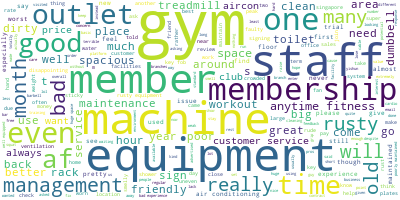

In [49]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(reviews['review_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

📊 Vocabulary size after filtering: 607
📋 Total documents: 243


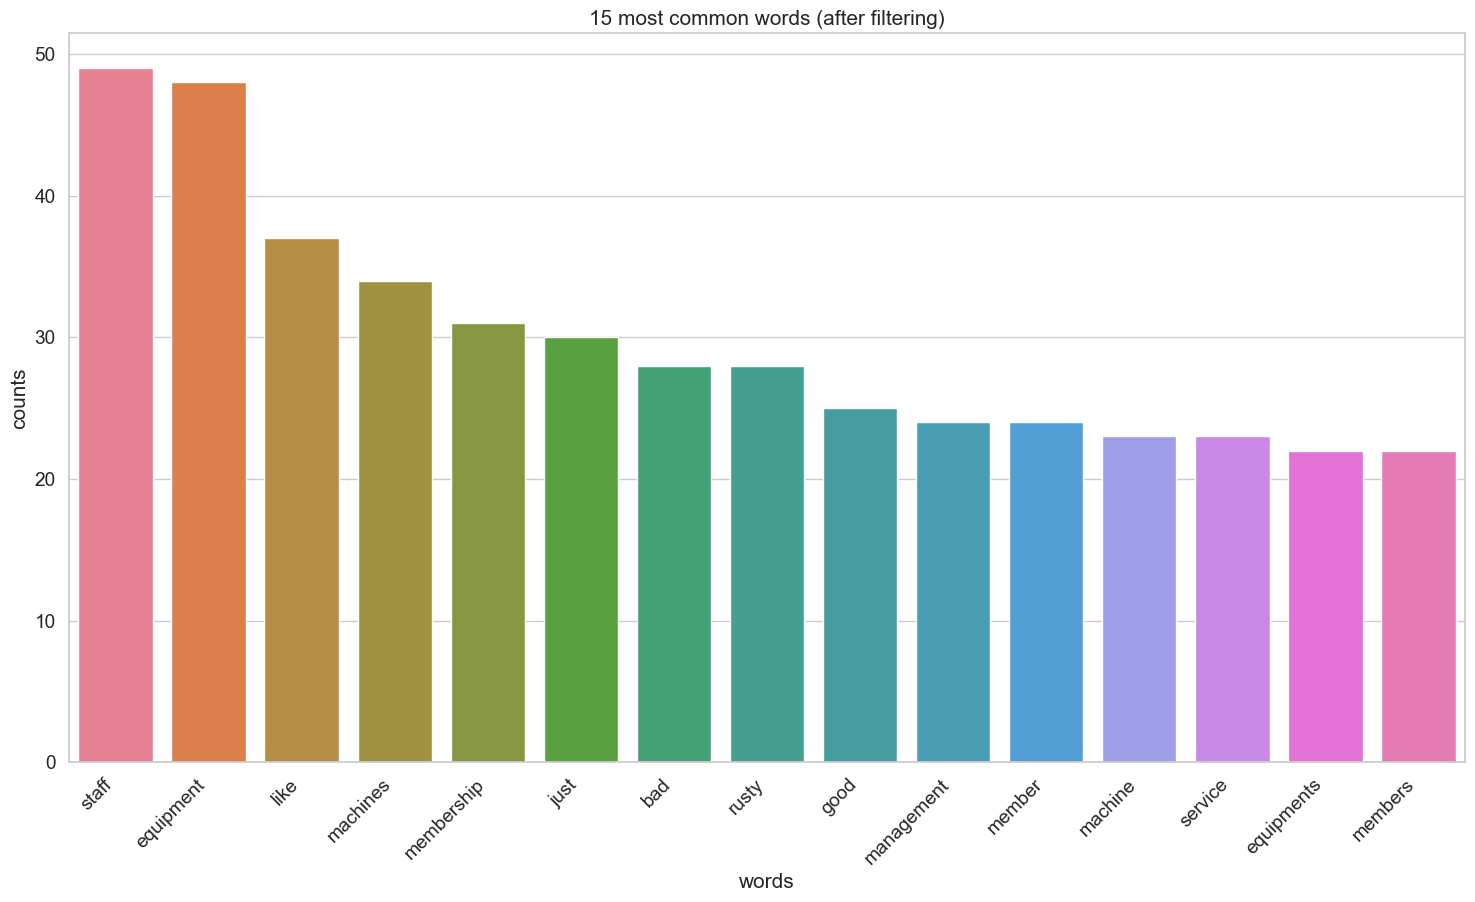

In [50]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# Define custom stop words (common gym/fitness terms that aren't very informative)
custom_stop_words = [
    'gym', 'fitness', 'anytime', 'af', 'workout', 'exercise',
    'visit', 'go', 'come', 'use', 'work', 'train'
]

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names_out()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:15]  # Show top 15
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='15 most common words (after filtering)')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x=x_pos, y=counts, palette='husl')
    plt.xticks(x_pos, words, rotation=45, ha='right') 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.tight_layout()
    plt.show()

# Combine default English stop words with custom gym-related stop words
all_stop_words = list(CountVectorizer(stop_words='english').get_stop_words()) + custom_stop_words

# Initialise the count vectorizer with extended stop words
count_vectorizer = CountVectorizer(
    stop_words=all_stop_words,
    min_df=2,  # Ignore terms that appear in less than 2 documents
    max_df=0.8,  # Ignore terms that appear in more than 80% of documents
    ngram_range=(1, 2)  # Include both single words and bigrams
)

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(reviews['review_text_processed'])

print(f"📊 Vocabulary size after filtering: {len(count_vectorizer.get_feature_names_out())}")
print(f"📋 Total documents: {count_data.shape[0]}")

# Visualise the most common words after filtering
plot_10_most_common_words(count_data, count_vectorizer)

In [37]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 10
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
machine membership like management trial staff just customer machines equipment

Topic #1:
machines like maintenance weights outlet rest make really equipments free

Topic #2:
big membership nice bad sign home equipments northpoint contact don

Topic #3:
machines bad space staff experience time equipment maintenance good equipments

Topic #4:
equipment membership old really staff machines machine signing lots dumbbell

Topic #5:
just staff member key bad service like time members key fob

Topic #6:
member best equipment dirty service poorly poorly maintained maintained air rusty

Topic #7:
rusty members area space equipment just place maintenance like basic

Topic #8:
equipment staff really outlet poor joining great month friend membership

Topic #9:
friendly good staff spacious staff friendly equipment equipments clean machines rusty


In [43]:
!pip install pyLDAvis==3.4.1

In [44]:
%%time
import warnings
import os
import pyLDAvis
import pyLDAvis.lda_model
import pickle 

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))

try:
    with open(LDAvis_data_filepath, 'rb') as f:
        LDAvis_prepared = pickle.load(f)
except FileNotFoundError:
    print(f"File not found: {LDAvis_data_filepath}. Preparing data instead.")
    LDAvis_prepared = pyLDAvis.lda_model.prepare(lda, count_data, count_vectorizer)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# Save the visualization as HTML
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')

LDAvis_prepared

File not found: ./ldavis_prepared_10. Preparing data instead.
CPU times: total: 625 ms
Wall time: 7.27 s
CPU times: total: 625 ms
Wall time: 7.27 s


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.068599 -0.002525       1        1  17.067038
5     -0.067821  0.123788       2        1  15.598622
8     -0.067239 -0.001428       3        1  15.277413
3      0.010754 -0.036274       4        1  12.021185
7      0.072840  0.023114       5        1  10.518644
4     -0.096827 -0.103367       6        1  10.410871
1      0.089717  0.017091       7        1   4.854555
2     -0.063072 -0.047402       8        1   4.802414
9      0.141346 -0.097570       9        1   4.760787
6      0.048902  0.124574      10        1   4.688471, topic_info=             Term       Freq      Total Category  logprob  loglift
228          good  20.000000  20.000000  Default  30.0000  30.0000
214      friendly  10.000000  10.000000  Default  29.0000  29.0000
500         staff  41.000000  41.000000  Default  28.0000  28.0000
496      spacious  12.000000  12.000000  Default  27.0000  27.0000
330        member  20.000000  20.000000  Default  26.0000  26.0000
..            ...        ...        ...      ...      ...      ...
124      customer   1.152196  13.629083  Topic10  -4.7169   0.5895
382        outlet   0.923598  13.394029  Topic10  -4.9380   0.3858
500         staff   0.777013  41.085404  Topic10  -5.1109  -0.9079
142  disappointed   0.753644   3.160827  Topic10  -5.1414   1.6264
59         branch   0.753644   4.775282  Topic10  -5.1414   1.2138

[536 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         2  0.327262     10
0         7  0.327262     10
0        10  0.327262     10
1         5  0.439363    100
1         9  0.439363    100
...     ...       ...    ...
601       2  0.370130  worst
601       3  0.123377  worst
601       5  0.370130  worst
601       7  0.123377  worst
601       9  0.123377  worst

[1022 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 6, 9, 4, 8, 5, 2, 3, 10, 7])